# All Exercises of Obligatory assignment 2, STK4900

Report is conducted in jupyter notebook and exported to PDF form.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

# Exercise 1

In [2]:
"""
Crabs.txt file indicators:
    y       : Indicator for one or more satellites (0 = no, 1 = yes)
    width   : Width of carapace of female crab (in cm)
    weight  : Weight of female crab (in kg)
    color   : Color of female crab (1 = Medium light, 2 = Medium, 3 = Medium dark, 4 = Dark)
    spine   : Conditions of spine (1 = Both good, 2 = One worn or broke, 3 = Both broken)
"""
data = pd.read_csv("data/crabs.txt", "\s+")

## a)

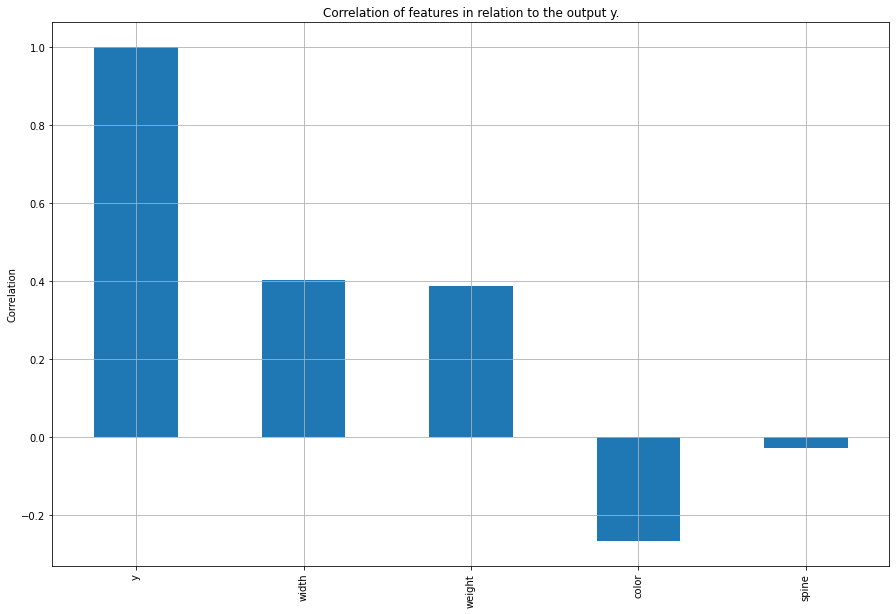

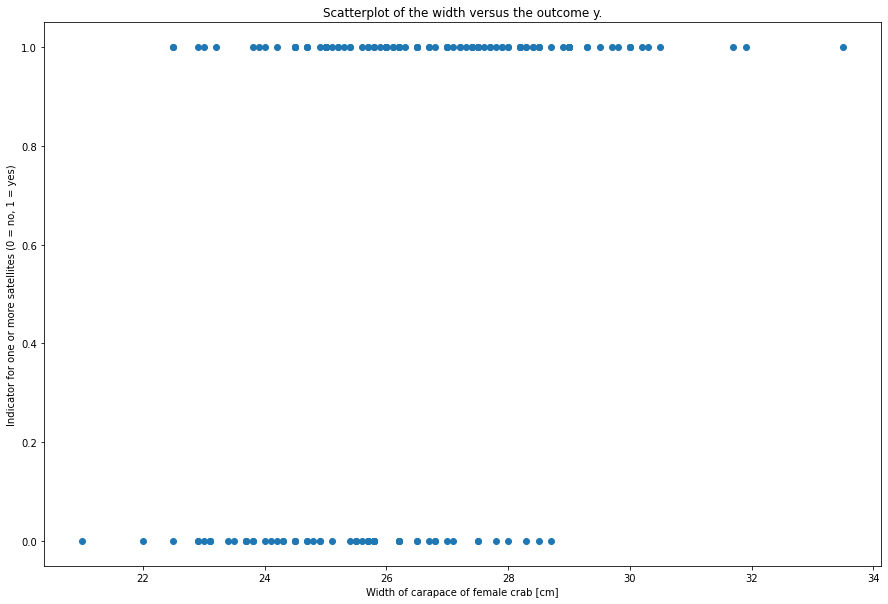

Classifier coefficient: 0.49
Classifier intercept: -12.22


In [3]:
"""
a)  Choose a suitable regression model for studying how the probability
    of presence of satellites depends on the explanatory variable width.
    Give the reasons of your choice of regression model.
"""

import sklearn.linear_model as lm

data.corr()["y"].plot.bar()
plt.ylabel("Correlation")
plt.title("Correlation of features in relation to the output y.")
plt.grid()
plt.show()

plt.scatter(data["width"], data["y"])
plt.title("Scatterplot of the width versus the outcome y.")
plt.xlabel("Width of carapace of female crab [cm]")
plt.ylabel("Indicator for one or more satellites (0 = no, 1 = yes)")
plt.show()

X = data['width'].values.reshape(-1,1)
y = data["y"].values

classifier = lm.LogisticRegression().fit(X, y)
print(f"Classifier coefficient: {classifier.coef_[0][0]:.2f}")
print(f"Classifier intercept: {classifier.intercept_[0]:.2f}")

The correlation of all the variables in relation to the outcome data *y* was plotted. As we can see, the width and weight are both quite correlated with the outcome. To create a regression model for the outcome, a logistic regression model was chosen. This is due to the categorical nature of the outcome variable *y*, where the value is either 0 (no satellites) or 1 (one or more satellites). There is no in between for these categorical variables, so logistic regression seems the most fitting.

## b)

In [4]:
"""
b)  In particular find the odds ratio of presences of satellites between
    crabs that differ one cm in width, and explain what this odds ratio
    means. Can the odds ratio be considered as an approximation to a
    relative risk in this situation? Also find a confidence interval for 
    the odds ratio and determine whether width influences presence of 
    satellites significantly.
"""
print("-----------------------------------")
print(f"Odds ratio of was found to be: {np.exp(classifier.coef_[0][0]):.2f}")



-----------------------------------
Odds ratio of was found to be: 1.64


The odds ratio is a statistical quantity that is meant to measure the significance of a measurement in relation to an outcome. In the case presented, the odds ratio between the explanatory variable width was found to be 1.64 in relation to the outcome variable *y*.

This ratio indicates that there is a 1.64 times larger chance to find one or more satellites in the vicinity of the female crab for each *1cm* width increase of the width of her carapace.

The difference between the relative risk and the odds ratio is that the risk ratio is between two probabilities whereas the odds ratio is between two odds. The odds ratio can be used as an approximation to the relative risks when the risks in the two groups are both relatively small. In our case, the risks p1 and p2 are given by:

## c)

In [5]:
"""
c)  Then consider the other explanatory variables weight, color and spine,
    one at a time. Discuss whether these covariates should be included as
    categorical or numerical. Determine which variables has a significant
    influence on the presence of satellites.
"""
print("-----------------------------------")
print("Weight logistic regression results:")
X = data['weight'].values.reshape(-1,1)
y = data["y"].values

classifier = lm.LogisticRegression().fit(X, y)
print(f"\tClassifier coefficient: {classifier.coef_[0][0]:.2f}")
print(f"\tClassifier intercept: {classifier.intercept_[0]:.2f}")

print("-----------------------------------")
print("Color logistic regression results:")
X = data['color'].values.reshape(-1,1)
y = data["y"].values

classifier = lm.LogisticRegression().fit(X, y)
print(f"\tClassifier coefficient: {classifier.coef_[0][0]:.2f}")
print(f"\tClassifier intercept: {classifier.intercept_[0]:.2f}")

print("-----------------------------------")
print("Spine logistic regression results:")
X = data['spine'].values.reshape(-1,1)
y = data["y"].values

classifier = lm.LogisticRegression().fit(X, y)
print(f"\tClassifier coefficient: {classifier.coef_[0][0]:.2f}")
print(f"\tClassifier intercept: {classifier.intercept_[0]:.2f}")
print("-----------------------------------")

-----------------------------------
Weight logistic regression results:
	Classifier coefficient: 1.60
	Classifier intercept: -3.20
-----------------------------------
Color logistic regression results:
	Classifier coefficient: -0.68
	Classifier intercept: 2.29
-----------------------------------
Spine logistic regression results:
	Classifier coefficient: -0.07
	Classifier intercept: 0.75
-----------------------------------


The variables which should be considered categorical are:
* Color 
* Spine

The variables which should be considered numerical are:
* Width
* Weight

And of course, the outcome *y* is also treated as categorical.

As we see from the classifier coefficients of the Color and Spine variables, they are not as impactful as the weight and width ones. This can also be seen in the correlation figure presented previously in exercise 1a). In that figure, the color variable had a negative correlation (with the outcome *y*), and spine had a correlation which was close to zero.

The two more significant variables to describing the presence of satellites are therefore the width and the weight variables, which both had a large correlation with *y* and had large classifier coefficients in the regression.

## d)

In [13]:
"""
d)  Next use all variables in the regression (as main effects), and describe
    your findings. Try to simplify the model only using the significant
    covariates. In particular discuss the covariates weight and width.
"""




'\nd)  Next use all variables in the regression (as main effects), and describe\n    your findings. Try to simplify the model only using the significant\n    covariates. In particular discuss the covariates weight and width.\n'

## e)

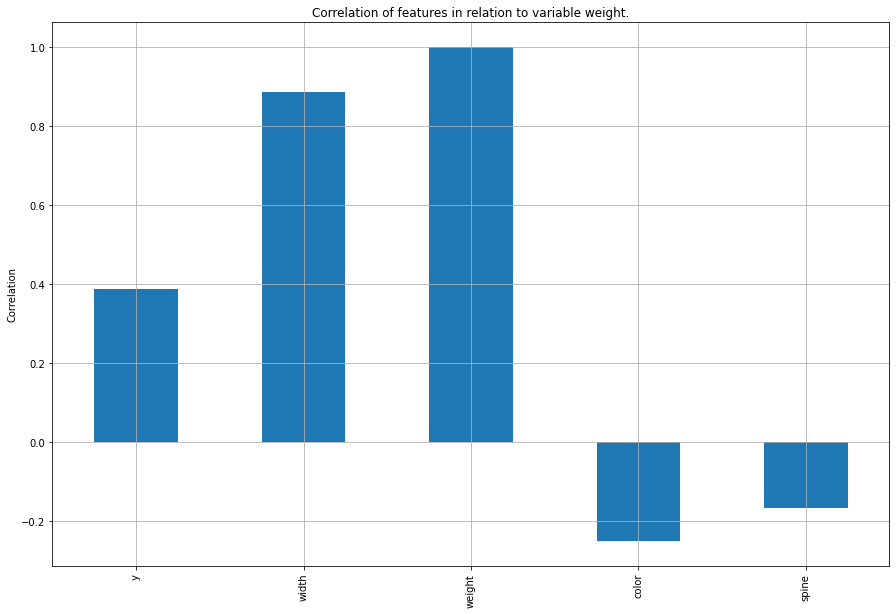

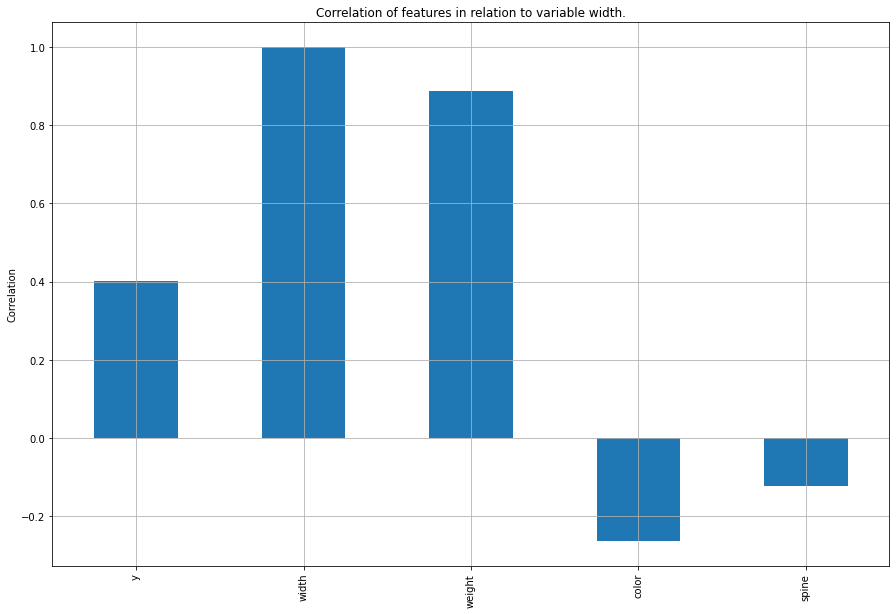

In [6]:
"""
e)  Finally investigate whether there are interactions between covariates.
"""
data.corr()["weight"].plot.bar()
plt.ylabel("Correlation")
plt.title("Correlation of features in relation to variable weight.")
plt.grid()
plt.show()

data.corr()["width"].plot.bar()
plt.ylabel("Correlation")
plt.title("Correlation of features in relation to variable width.")
plt.grid()
plt.show()

There are definitive interactions between the covariates. The two variables width and weight both have high correlations with eachother, and relatively low correlations with the rest of the variables. If the female crab has a large carapace width, then it is also likely to have a large weight. The same is true in reverse. Both of these cause the crab to be more attractive to the satellites it seems. 

# Exercise 2

In [7]:
"""
olympic.txt file indicators:
    Total1996       : Number of medals won by the nation in the previous game
    Log.population  : Logarithm of the nation's population size per 1000
    Log.athletes    : Logarithm of th enumber of athletes representing the nation
    GDP.per.cap     : The par capita Gross Domestic Product of the nation
"""

# data2 = pd.read_csv("data/olympic.txt", "\s+")

"\nolympic.txt file indicators:\n    Total1996       : Number of medals won by the nation in the previous game\n    Log.population  : Logarithm of the nation's population size per 1000\n    Log.athletes    : Logarithm of th enumber of athletes representing the nation\n    GDP.per.cap     : The par capita Gross Domestic Product of the nation\n"

# Exercise 3

In [8]:
"""
cirrhosis.txt file indicators:
    status  : Indicator for dead/censoring (1=dead; 0=censored)
    time    : Time in days from start of treatment to death/censoring
    treat   : Treadment (0=prednisone; 1=placebo)
    sex     : Gender (0=female; 1=male)
    asc     : Ascites at start of treatment (0=none; 1=slight; 2=marked)
    age     : Age in years at start of treatment 
    agegr   : Age group (1=<50; 2=50-65; 3=>65)
"""

data = pd.read_csv("data/cirrhosis.txt", "\s+")

## a)

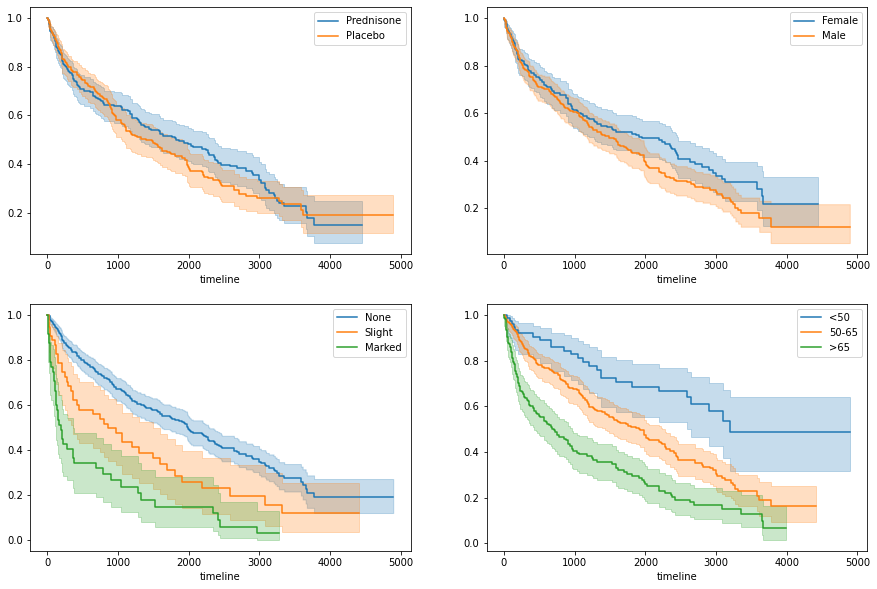

In [9]:
"""
a)  Make Kaplan-Meier plots for the survival function for each level of the
    covariates treatment, sex, ascites, and group age (four plots in total).
    Discuss what the plots tell you.
"""
from lifelines import KaplanMeierFitter

obj = KaplanMeierFitter()

ax1 = plt.subplot(221)
grp0 = data[data["treat"] == 0]
grp1 = data[data["treat"] == 1]
obj.fit(grp0["time"], grp0["status"], label = "Prednisone").plot(ax=ax1)
obj.fit(grp1["time"], grp1["status"], label = "Placebo").plot(ax=ax1)

ax2 = plt.subplot(222)
grp2 = data[data["sex"] == 0]
grp3 = data[data["sex"] == 1]
obj.fit(grp2["time"], grp2["status"], label = "Female").plot(ax=ax2)
obj.fit(grp3["time"], grp3["status"], label = "Male").plot(ax=ax2)

ax3 = plt.subplot(223)
grp4 = data[data["asc"] == 0]
grp5 = data[data["asc"] == 1]
grp6 = data[data["asc"] == 2]
obj.fit(grp4["time"], grp4["status"], label = "None").plot(ax=ax3)
obj.fit(grp5["time"], grp5["status"], label = "Slight").plot(ax=ax3)
obj.fit(grp6["time"], grp6["status"], label = "Marked").plot(ax=ax3)

ax4 = plt.subplot(224)
grp7 = data[data["agegr"] == 1]
grp8 = data[data["agegr"] == 2]
grp9 = data[data["agegr"] == 3]
obj.fit(grp7["time"], grp7["status"], label = "<50").plot(ax=ax4)
obj.fit(grp8["time"], grp8["status"], label = "50-65").plot(ax=ax4)
obj.fit(grp9["time"], grp9["status"], label = ">65").plot(ax=ax4)

plt.show()

The Kaplan-Meier plots for the survival function for each level tell us a lot about the data and which of the various explanatory variables impact the outcome of the patients the most.

In the first plot, the treatment K-M curve is illustrated. Both of the curves have a similar decline, indicating that the Prednisone treatment did not have a significantly stronger effect than the placebo. It may be that the Prednisone treatment is more beneficial to survival in the short-time period. The survival rate is around 50% for the Prednisone patients and around 40% for the Placebo patients after 2,000 days. This comes with a price though, as the Prednisone survival rate seems to drop down lower than the placebo in the long run (around the 4,000th day). These are both within the error margins though, so it is difficult to say anything definitive about the impact of the Prednisone treatment

The second plot shows that the survival rate of males is lower than that of females. This could be due to various other factors, so this plot also does not tell us much. The lifetime expectencies of males is generally lower than females. If the lifestyles of these individuals were mapped better (e.g. fitness, eating habits, etc.), then the gender separation may lead to a more meaningful insight.

The third plot indicates something significant. The degree of Ascites at the start of the treatment has a large impact on the patient survival rate. More ascites lead to a shorter life expectancy. Even after 1,000 days, the survival rate of the "Marked" patients is down to 20%, whereas the "None" patients have a survival rate of around 70%.

The age group plot serves a similar function to that of the ascites. The older the patient is, the less likely the patient is to survive in the long term. This is expected as age tends to bring up more health complications.

## b)

In [10]:
"""
b)  For each of the covariates, use the logrank test to investigate if the 
    covariate has a significant effect on survival.
"""

from lifelines.statistics import logrank_test
from lifelines.statistics import multivariate_logrank_test

print("=======================")
print("Treatment logrank test:")
logrank_test(
    grp0["time"], 
    grp1["time"], 
    event_observed_A=grp0["status"],
    event_observed_B=grp1["status"]
).print_summary()

print("=======================")
print("Sex logrank test:")
logrank_test(
    grp2["time"], 
    grp3["time"], 
    event_observed_A=grp2["status"],
    event_observed_B=grp3["status"]
).print_summary()

# Use multivariate logrank tests when n>2

print("=======================")
print("Ascites logrank test:")
multivariate_logrank_test(
    data["time"],
    data["asc"],
    data["status"]
).print_summary()

print("=======================")
print("Multivariate Agegroup logrank test:")
multivariate_logrank_test(
    data["time"],
    data["agegr"],
    data["status"]
).print_summary()
print("=======================")


Treatment logrank test:


Sex logrank test:


Ascites logrank test:


Multivariate Agegroup logrank test:


Each of the covariates had a logrank test 

... 


This covariate had a significant effect on survival.

# c)

In [11]:
"""
c)  Then do multiple Cox regression where the effects of all the covariates
    are studied simultaneously. Use age in years (not grouped). Summarize
    (and interpret) your findings. For this 'full' model with all covariates
    as main effects, find a 95% confidence interval for the hazard ratio for 
    men versus women when all other covariates are constant. Write a
    conclusion about the effect of prednisone in this trial.
"""

from lifelines import CoxPHFitter

cox = CoxPHFitter()
cox.fit(data, "time", event_col="status")
cox.print_summary()

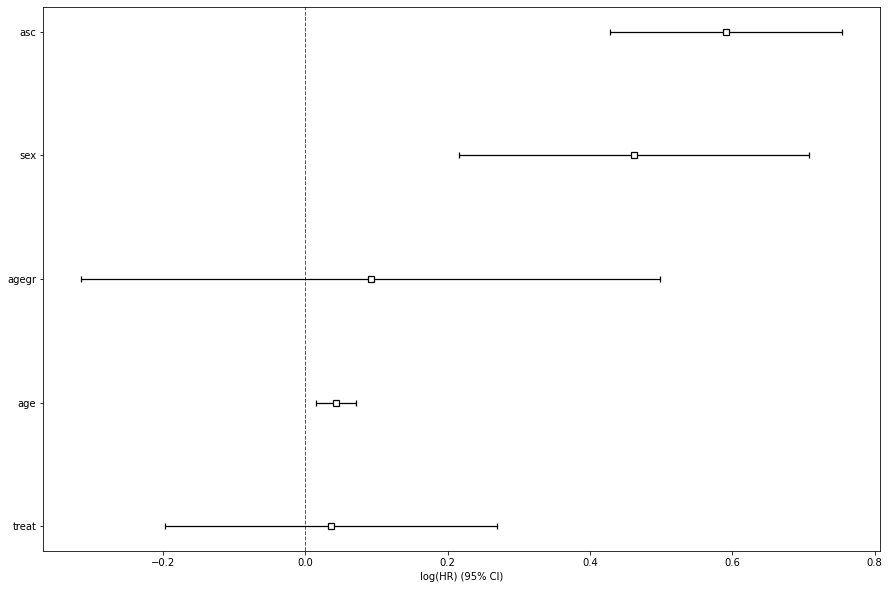

In [12]:
cox.plot()